# Fitting Mulitple Classification models


In [ ]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [ ]:
app_train = pd.read_csv('/Users/sami/Desktop/home-credit-default-risk/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
app_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [ ]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * mis_val/ len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +" columns that have missing values.")
    return mis_val_table_ren_columns
# function to check percentage of missing values in a column

In [ ]:
missing_values = missing_values_table(app_train)
missing_values

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
...,...,...
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0


In [ ]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [ ]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0
for col in app_train:
    if app_train[col].dtype == 'object':
        if len(list(app_train[col].unique())) <= 2:
            le.fit(app_train[col])
            app_train[col] = le.transform(app_train[col])
            le_count += 1
print('%d columns were label encoded.' % le_count)
# performing label encoding

3 columns were label encoded.


In [ ]:
app_train = pd.get_dummies(app_train)
print('Training Features shape: ', app_train.shape)
# performing one hhot encoding on categorical data

Training Features shape:  (307511, 243)


In [ ]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [ ]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5, 0, 'Days Employment')

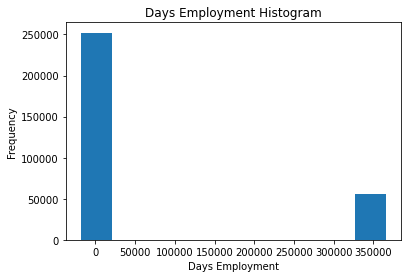

In [ ]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')

In [ ]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))
# calculating percentage of anomalies

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Text(0.5, 0, 'Days Employment')

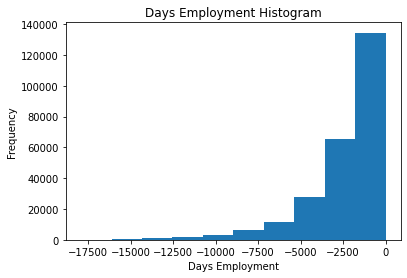

In [ ]:
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

In [ ]:
correlations = app_train.corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

In [ ]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982737

Text(0, 0.5, 'Count')

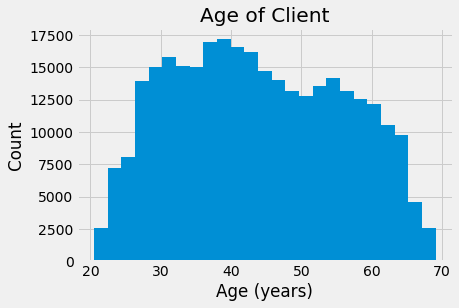

In [ ]:
plt.style.use('fivethirtyeight')
plt.hist(app_train['DAYS_BIRTH'] / 365, bins = 25)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')



```
# This is formatted as code
```

# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,1,0,1,0,False
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,1,0,0,0,0,0,0,1,0,False
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,False
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,False
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,0,1,0,1,0,False
307507,456252,0,0,0,1,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,0,1,0,1,0,True
307508,456253,0,0,0,1,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1,0,0,1,0,False
307509,456254,1,0,0,1,0,171000.0,370107.0,20205.0,319500.0,...,0,0,0,0,0,1,0,1,0,False


In [ ]:
app_train.dtypes

SK_ID_CURR                         int64
TARGET                             int64
NAME_CONTRACT_TYPE                 int64
FLAG_OWN_CAR                       int64
FLAG_OWN_REALTY                    int64
                                   ...  
WALLSMATERIAL_MODE_Stone, brick    uint8
WALLSMATERIAL_MODE_Wooden          uint8
EMERGENCYSTATE_MODE_No             uint8
EMERGENCYSTATE_MODE_Yes            uint8
DAYS_EMPLOYED_ANOM                  bool
Length: 244, dtype: object

In [ ]:
x = app_train.copy()
y = x.TARGET
x = x.drop(['TARGET'],axis=1)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
imputer = SimpleImputer(missing_values=np.nan, strategy='median')   # MEDIAN STRATEGY to fill null values
scaler = MinMaxScaler(feature_range = (0, 1))
imputer.fit(x)
x = imputer.transform(x)
scaler.fit(x)
x = scaler.transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=16)  # followed 75-25 split
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=15)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[70657,    84],
       [ 6074,    63]])

In [ ]:
from sklearn.metrics import classification_report
target_names = ['can_repay', 'cannot_repay']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   can_repay       0.92      1.00      0.96     70741
cannot_repay       0.43      0.01      0.02      6137

    accuracy                           0.92     76878
   macro avg       0.67      0.50      0.49     76878
weighted avg       0.88      0.92      0.88     76878



In [ ]:
acc_lr = metrics.accuracy_score(y_test,y_pred)
acc_lr

0.9198990608496579

<AxesSubplot: >

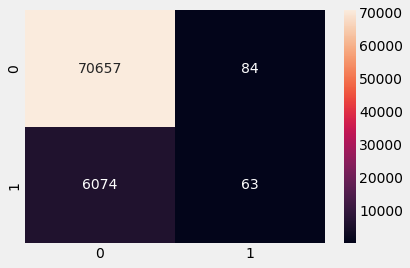

In [ ]:
import seaborn as sns
sns.heatmap(cnf_matrix,annot = True,fmt='g')


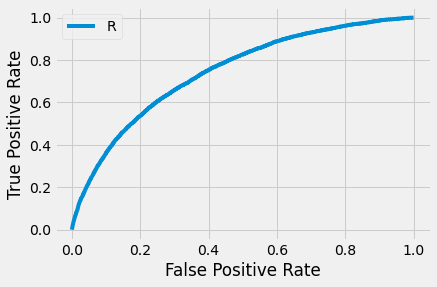

In [ ]:
y_pred_proba_lr = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_lr)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend('ROC curve for logistic regression',loc = 'upper left')
plt.show()

# Decision Tree

In [ ]:
x = app_train.copy()
y = x.TARGET
x = x.drop(['TARGET'],axis=1)
feature_names = x.columns
labels = y.unique()
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
scaler = MinMaxScaler(feature_range = (0, 1))
imputer.fit(x)
x = imputer.transform(x)
scaler.fit(x)
x = scaler.transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=16)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.tree import export_text
tree_rules = export_text(classifier,feature_names = list(feature_names))
#print(tree_rules)

In [ ]:
y_pred_dt = classifier.predict(x_test)

In [ ]:
cnfmx_dt = metrics.confusion_matrix(y_test,y_pred_dt)
cnfmx_dt

array([[64591,  6150],
       [ 5085,  1052]])

In [ ]:
acc_dt = metrics.accuracy_score(y_test,y_pred_dt)
acc_dt

0.8538593615858894

<AxesSubplot: >

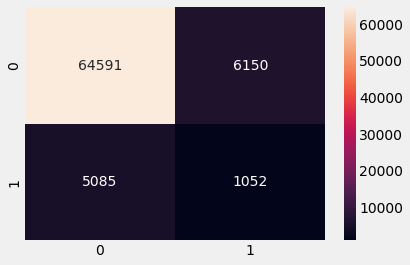

In [ ]:
sns.heatmap(cnfmx_dt,annot = True, fmt = 'g' )

In [ ]:
from sklearn.metrics import classification_report
target_names = ['can_repay', 'cannot_repay']
print(classification_report(y_test, y_pred_dt, target_names=target_names))

              precision    recall  f1-score   support

   can_repay       0.93      0.91      0.92     70741
cannot_repay       0.15      0.17      0.16      6137

    accuracy                           0.85     76878
   macro avg       0.54      0.54      0.54     76878
weighted avg       0.86      0.85      0.86     76878



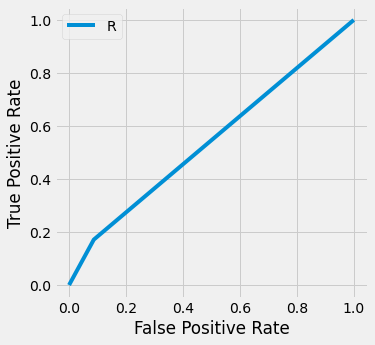

In [ ]:
y_pred_proba_dt = classifier.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_dt)
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend('ROC curve for Decision Trees')
plt.show()

# Random Forest

In [ ]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import graphviz

In [ ]:
x = app_train.copy()
y = x.TARGET
x = x.drop(['TARGET'],axis=1)
feature_names = x.columns
labels = y.unique()
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
scaler = MinMaxScaler(feature_range = (0, 1))
imputer.fit(x)
x = imputer.transform(x)
scaler.fit(x)
x = scaler.transform(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=16)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf.predict(x_test)

In [ ]:
acc_rf = metrics.accuracy_score(y_test,y_pred_rf)
acc_rf

0.920224251411327

In [ ]:
from sklearn.metrics import classification_report
target_names = ['can_repay', 'cannot_repay']
print(classification_report(y_test, y_pred_rf, target_names=target_names))

              precision    recall  f1-score   support

   can_repay       0.92      1.00      0.96     70741
cannot_repay       0.70      0.00      0.00      6137

    accuracy                           0.92     76878
   macro avg       0.81      0.50      0.48     76878
weighted avg       0.90      0.92      0.88     76878



In [ ]:
cnfmx_rf = metrics.confusion_matrix(y_test,y_pred_rf)
cnfmx_rf

array([[70738,     3],
       [ 6130,     7]])

<AxesSubplot: >

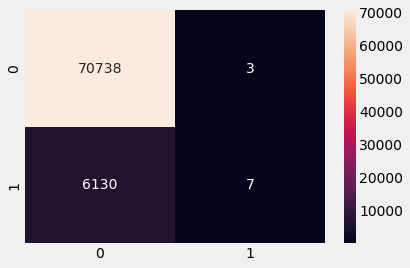

In [ ]:
sns.heatmap(cnfmx_rf,annot = True, fmt = 'g' )

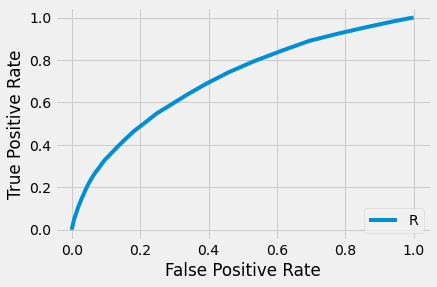

In [ ]:
y_pred_proba_rf = rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_rf)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend('ROC curve for Random Forest',loc='lower right')
plt.show()

# k-nearest neighbours

In [ ]:
#knn,naive bayes,comments

In [ ]:
x = app_train.copy()
y = x.TARGET
x = x.drop(['TARGET'],axis=1)
feature_names = x.columns
labels = y.unique()
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
scaler = MinMaxScaler(feature_range = (0, 1))
imputer.fit(x)
x = imputer.transform(x)
scaler.fit(x)
x = scaler.transform(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=16)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn5.fit(x_train, y_train)
#knn1.fit(x_train, y_train)
y_pred_5 = knn5.predict(x_test)
#y_pred_1 = knn1.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5))
#print("Accuracy with k=1", accuracy_score(y_test, y_pred_1))

Accuracy with k=5 0.9156715835479591


In [ ]:
#knn7 = KNeighborsClassifier(n_neighbors = 7)
#knn7.fit(x_train, y_train)
#y_pred_7 = knn5.predict(x_test)

In [ ]:
#print("Accuracy with k=7", accuracy_score(y_test, y_pred_7))

In [ ]:
from sklearn.metrics import classification_report
target_names = ['can_repay', 'cannot_repay']
print(classification_report(y_test, y_pred_5, target_names=target_names))

              precision    recall  f1-score   support

   can_repay       0.92      0.99      0.96     70741
cannot_repay       0.19      0.02      0.03      6137

    accuracy                           0.92     76878
   macro avg       0.56      0.51      0.49     76878
weighted avg       0.86      0.92      0.88     76878



In [ ]:
cnfmx_knn = metrics.confusion_matrix(y_test,y_pred_5)
cnfmx_knn

array([[70287,   454],
       [ 6029,   108]])

<AxesSubplot: >

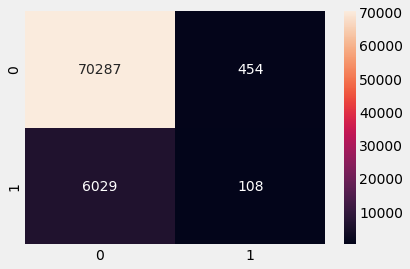

In [ ]:
sns.heatmap(cnfmx_knn,annot = True, fmt = 'g' )

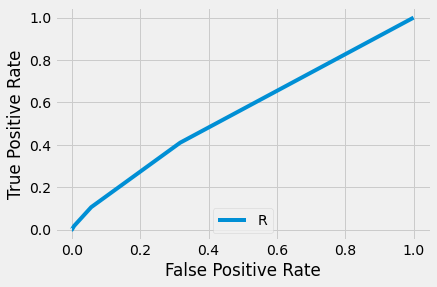

In [ ]:
y_pred_proba_knn = knn5.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_knn)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend('ROC curve for KNN',loc='lower center')
plt.show()

# Naive bayes

In [ ]:
x = app_train.copy()
y = x.TARGET
x = x.drop(['TARGET'],axis=1)
feature_names = x.columns
labels = y.unique()
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
scaler = MinMaxScaler(feature_range = (0, 1))
imputer.fit(x)
x = imputer.transform(x)
scaler.fit(x)
x = scaler.transform(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=16)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_nb))

0.16014984781081715


In [ ]:
from sklearn.metrics import classification_report
target_names = ['can_repay', 'cannot_repay']
print(classification_report(y_test, y_pred_nb, target_names=target_names))

              precision    recall  f1-score   support

   can_repay       0.95      0.09      0.17     70741
cannot_repay       0.08      0.95      0.15      6137

    accuracy                           0.16     76878
   macro avg       0.52      0.52      0.16     76878
weighted avg       0.88      0.16      0.17     76878



In [ ]:
cnfmx_nb = metrics.confusion_matrix(y_test,y_pred_nb)
cnfmx_nb

array([[ 6485, 64256],
       [  310,  5827]])

<AxesSubplot: >

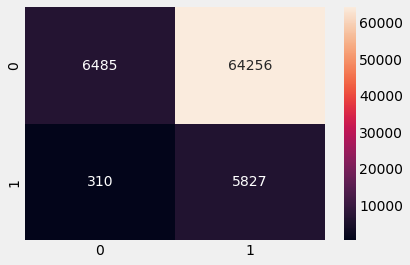

In [ ]:
sns.heatmap(cnfmx_nb,annot = True, fmt = 'g' )

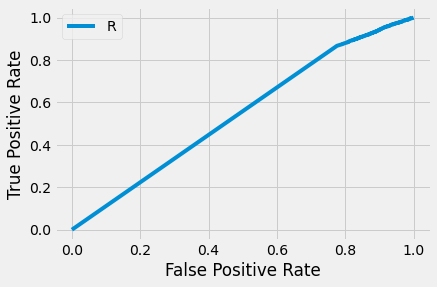

In [ ]:
y_pred_proba_nb = nb.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_nb)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend('ROC curve for GaussianNB')
plt.show()

## Model 1 (Logistic Regression):

Precision: 0.43 for positive class

Recall: 0.01 for positive class

F1-score: 0.02 for positive class

# Accuracy: 92%

## Model 2 (Decision Tree Classifier):

Precision: 0.15 for positive class

Recall: 0.17 for positive class

F1-score: 0.16 for positive class

Accuracy: 85%

## Model 3 (Random Forest ):

Precision: 0.70 for positive class

Recall: 0.00 for positive class

F1-score: 0.00 for positive class

Accuracy: 92%

## Model 4 (K-Nearest Neighbors):

Precision: 0.19 for positive class

Recall: 0.02 for positive class

F1-score: 0.03 for positive class

Accuracy: 92%

## Model 5 (Naive Bayes):

Precision: 0.08 for positive class

Recall: 0.95 for positive class

F1-score: 0.15 for positive class

Accuracy: 16%

# Conclusion:

The models exhibit varied performance across different metrics. The Gaussian Naive Bayes, Support Vector Machine, and K-Nearest Neighbors models show high accuracy rates but are substantially weak in handling the positive class with very low recall rates. The Decision Tree Classifier and Random Forest demonstrate more balanced precision and recall for the positive class, but their overall accuracy is lower, particularly for the Random Forest which drastically fails in overall accuracy but excels in positive class recall.

This range of outcomes suggests a need for model tuning, possibly balancing the class weight or exploring feature engineering to enhance model sensitivity and specificity. Deciding on the best model would depend on the specific requirements of recall or precision prioritization in the context of the application.

# References
"Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" by Aurélien Géron

Great for understanding how to apply machine learning methods in practice, including data preprocessing and model evaluation.

"Python for Data Analysis" by Wes McKinney
This book is ideal for mastering data manipulation with pandas, which is crucial for data cleaning and feature engineering.

Coursera: Machine Learning by Andrew Ng
A well-rounded course that covers machine learning fundamentals, ideal for understanding the theory behind algorithms used in the notebook.

DataCamp: Feature Engineering for Machine Learning in Python
This course specifically focuses on creating and transforming features to improve machine learning models.

# MIT License

Copyright (c) 2024 Sumanth Mereddi and AISkunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.


Copyright (c) 2024 Nagapriyatham Pindi and AISkunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.